Script for making plots from Petr's population files
Ira Thorpe, 2018-11-26

In [1]:
# python libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define method to load data from files
def loadPopData(filename):
    dat = np.loadtxt(filename)
    lat = dat[[np.arange(0,90,1),1]]
    lon = dat[[np.arange(0,np.shape(dat)[0],90),0]]
    P = np.zeros((9,np.shape(lon)[0],np.shape(lat)[0]))
    Px = [1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3]
    for ii in range(0,9):
          P[ii] = np.reshape(dat[...,ii+2],[np.shape(lon)[0],np.shape(lat)[0]])
    out = {'lat' : lat, 'lon' : lon, 'P' : P, 'Px' : Px}
    return out

In [3]:
# read all population files
popNames = ['JFC','HTC','OCC','AST']
# make plot directory
baseDir = '../data/models'
plotDir = '../plots'
pop = dict()
for ii in range(0,len(popNames)):
    pop[ii] = loadPopData(baseDir + '/' + popNames[ii] + '_impulse.dat')
    


In [4]:
# compute and fit CDF
Ptot = np.zeros((len(pop),np.shape(pop[0]['P'])[0]))
lfit = np.zeros((len(pop),2))
for ii in range(0,len(pop)):
    for jj in range(0,len(pop[0]['Px'])):
        Ptot[ii,jj] = np.sum(pop[ii]['P'][jj])
    x = np.log10(pop[ii]['Px'])
    y = np.log10(Ptot[ii,...])
    lfit[ii] = np.polyfit(x,y,1)


In [47]:
mantissa = (10**(lfit[0][1])*3.154e7*((1e-6)**lfit[0][0]))
lineLab = '$%3.1f P_{min}^{%2.2f}$' % (mantissa, lfit[0][0])
print(lineLab)

$14.6 P_{min}^{-0.88}$


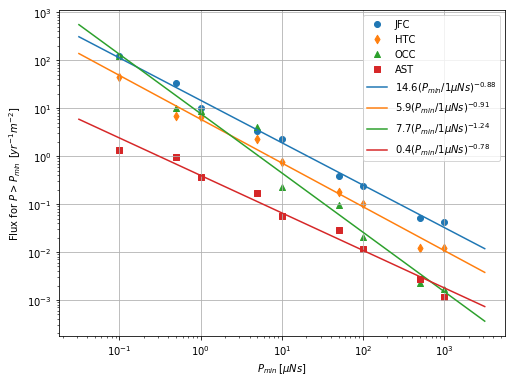

In [62]:
# CDF plot
xfit = np.logspace(-7.5,-2.5,128)
mrkrs = ['o','d','^','s']
fig = plt.figure(figsize = [8, 6]);
plt.xscale('log')
plt.yscale('log')
for ii in range(0,len(pop)):
    plt.scatter(1.0e6*np.array(pop[ii]['Px']),Ptot[ii,...]*3.154e7,marker = mrkrs[ii], label = popNames[ii])
    mantissa = (10**(lfit[ii][1])*3.154e7*((1e-6)**lfit[ii][0]))
    lineLab = '$%3.1f (P_{min}/1\mu N s)^{%2.2f}$' % (mantissa, lfit[ii][0])
    plt.plot(xfit*1e6,(10**lfit[ii][1])*(xfit**lfit[ii][0])*3.154e7, label = lineLab)
    
ax = fig.get_axes()[0]
handles,labels = ax.get_legend_handles_labels()
handles = [handles[4], handles[5], handles[6], handles[7], handles[0], handles[1], handles[2], handles[3]]
labels = [labels[4], labels[5], labels[6], labels[7], labels[0], labels[1], labels[2], labels[3]]
ax.legend(handles,labels,loc=1)
plt.grid(True)
plt.ylabel('Flux for $P > P_{min}\:\:[yr^{-1} m^{-2}]$')
plt.xlabel('$P_{min}\:[\mu N s]$')
fig.savefig(plotDir + '/popCDF.eps', format = 'eps')

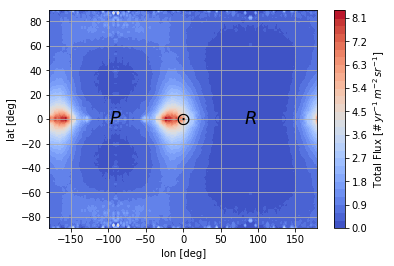

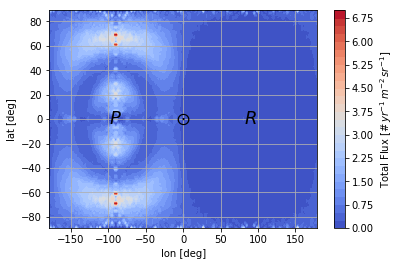

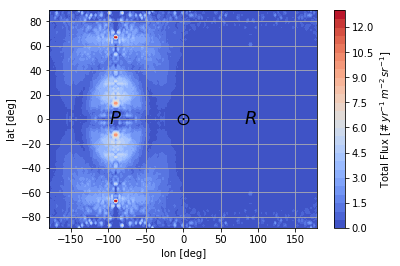

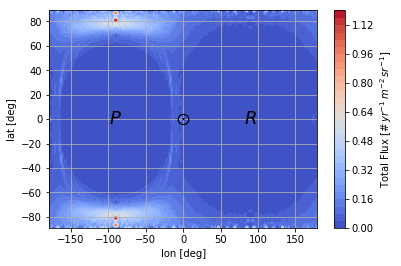

In [30]:
# flux maps
for ii in range (0,len(pop)):
    # read in momentum sky bins
    lon = pop[ii]['lon']*np.pi/180
    lat = pop[ii]['lat']*np.pi/180
    Psky = np.transpose(pop[ii]['P'][2])
    dlat = lat[1]-lat[0]
    dlon = lon[1]-lon[0]
    dA = np.cos(lat)*dlat*dlon
    Fsky = np.zeros(np.shape(Psky))
    for jj in range(0,len(lon)):
        Fsky[...,jj] = Psky[...,jj]/dA

    
    fig = plt.figure()
    plt.contourf(lon*180/np.pi, lat*180/np.pi,3.154e7*Fsky,30, cmap=matplotlib.cm.coolwarm)
    plt.text(0,0,'$\odot$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    plt.text(-90,0,'$P$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    plt.text(90,0,'$R$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    #plt.title(popNames[ii])
    plt.grid(True)
    plt.xlabel('lon [deg]')
    plt.ylabel('lat [deg]')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Total Flux $[\#\,yr^{-1}\,m^{-2}\,sr^{-1}]$')
    fig.savefig(plotDir + '/map_' + popNames[ii] + '.eps', format = 'eps')

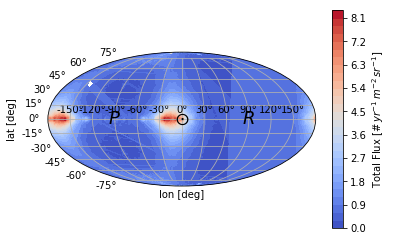

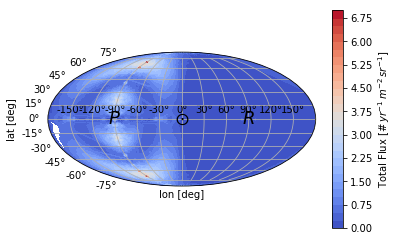

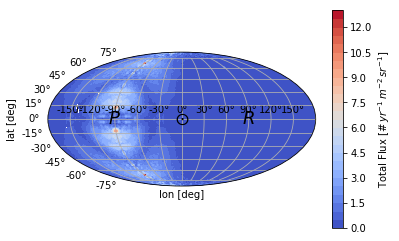

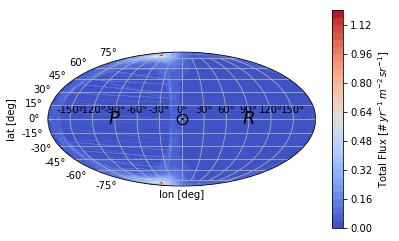

In [34]:
# flux maps (Mollweide version)
for ii in range (0,len(pop)):
    # read in momentum sky bins
    lon = pop[ii]['lon']*np.pi/180
    lat = pop[ii]['lat']*np.pi/180
    Psky = np.transpose(pop[ii]['P'][2])
    dlat = lat[1]-lat[0]
    dlon = lon[1]-lon[0]
    dA = np.cos(lat)*dlat*dlon
    Fsky = np.zeros(np.shape(Psky))
    for jj in range(0,len(lon)):
        Fsky[...,jj] = Psky[...,jj]/dA

    fig = plt.figure()
    plt.subplot(111,projection='mollweide')
    plt.contourf(lon, lat,3.154e7*Fsky,30, cmap=matplotlib.cm.coolwarm)
    plt.text(0,0,'$\odot$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    plt.text(-np.pi/2,0,'$P$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    plt.text(np.pi/2,0,'$R$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    #plt.title(popNames[ii])
    plt.grid(True)
    plt.xlabel('lon [deg]')
    plt.ylabel('lat [deg]')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Total Flux $[\#\,yr^{-1}\,m^{-2}\,sr^{-1}]$')
    fig.savefig(plotDir + '/MollMap_' + popNames[ii] + '.eps', format = 'eps')